## Introduction

Amid complex global challenges like climate change, social inequality, biodiversity loss, and pandemics, electric vehicles (EVs) offer a key solution for reducing greenhouse gas emissions. With zero tailpipe emissions and potential renewable energy use, EVs promote sustainability while lowering fossil fuel dependence, cutting fuel costs, and improving air quality for healthier communities.

This project has 4 components:

Section 1: Data analysis and visualization

Section 2: Mandatory Component (Clustering)

Section 3: Exploratory Component

Section 4: Conclusions

# 1. Data Analysis and Visualisation

## Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, boxcox
from sklearn.metrics import silhouette_score
%matplotlib inline

First, the dataset was downloaded and saved as a dataframe. Then basic information about the dataset was printed out in order to get to know the data.

In [2]:
df = pd.read_csv("EVChargingStationUsage.csv")

display(df.head())
print()

display(df.info())
print()

display(df.describe())
print()

/tmp/ipykernel_47/512861175.py:2: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EVChargingStationUsage.csv")


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  G

None

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


Duplicates are dropped and the times and dates were converted to an universal datetime format. Total duration and charging time were also converted to minutes.

In [3]:
# Drop duplicates
df = df.drop_duplicates()

# Converting times and dates to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
# End Date has mixed formats of standard datetime strings and excel serial numbers so we need to parse it manually
# Preserve the original 'End Date' values
df['End Date Raw'] = df['End Date']

# First, trying to parse 'End Date' as standard datetime strings
df['End Date'] = pd.to_datetime(df['End Date Raw'], errors='coerce')

# Identify entries where parsing failed (NaT values) and print number of such entries
mask = df['End Date'].isnull()
remaining_nulls = mask.sum()
print(f"There are {remaining_nulls} entries in 'End Date' that could not be parsed.")

# For these entries, try to parse as Excel serial numbers
def parse_excel_date(x):
    try:
        return pd.to_datetime(float(x), unit='D', origin='1899-12-30')
    except:
        return pd.NaT

df.loc[mask, 'End Date'] = df.loc[mask, 'End Date Raw'].apply(parse_excel_date)

# Check if there are still NaT values
remaining_nulls = df['End Date'].isnull().sum()
print(f"There are {remaining_nulls} entries in 'End Date' that could not be parsed.")

# Convert 'Total Duration (hh:mm:ss)' and 'Charging Time (hh:mm:ss)' columns to timedelta
df['Total Duration (min)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)']).dt.total_seconds() / 60
df['Charging Time (min)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)']).dt.total_seconds() / 60

# Dropping 'Charging Time (hh:mm:ss)' and 'Total Duration (hh:mm:ss)' columns
df = df.drop(['Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)'], axis=1)

df

There are 40 entries in 'End Date' that could not be parsed.
There are 0 entries in 'End Date' that could not be parsed.


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Energy (kWh),GHG Savings (kg),...,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,End Date Raw,Total Duration (min),Charging Time (min)
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,7/29/2011 23:20,6.249457,2.625,...,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN,7/29/2011 23:20,183.533333,114.050000
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,7/30/2011 0:02,0.106588,0.045,...,Customer,4,94301.0,4169.0,NaN,NaN,NaN,7/30/2011 0:02,2.100000,1.900000
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,7/30/2011 12:34,14.951777,6.280,...,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN,7/30/2011 12:34,257.533333,257.466667
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,7/30/2011 16:55,7.159643,3.007,...,Customer,6,94302.0,2545.0,NaN,NaN,NaN,7/30/2011 16:55,123.400000,122.966667
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,7/30/2011 20:03,1.957765,0.822,...,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN,7/30/2011 20:03,71.400000,43.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,12/31/2020 17:16,1.841000,0.773,...,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW,12/31/2020 17:14,35.733333,35.300000
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,12/31/2020 20:32,12.744000,5.352,...,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW,12/31/2020 20:31,223.016667,134.066667
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,1/1/2021 10:57,29.665000,12.459,...,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW,1/1/2021 10:56,1048.233333,308.200000
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,12/31/2020 21:56,11.976000,5.030,...,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW,12/31/2020 21:55,245.566667,233.700000


The next step is checking unique values for selected attributes, which seemed to have very few unique values in order to decide if the attribute will be useful for the project.

Converted 'Start Date' to 'Start Hour' and visualized the number of charging sessions by Start and End Hour in each of the time zones.

Noticed that columns Start Time Zone and End Time Zone don't really make sense, as the dataset is related to only one city in one time zone. Decided to visualize the columns Start Date and End Date that are related to the time zone columns.

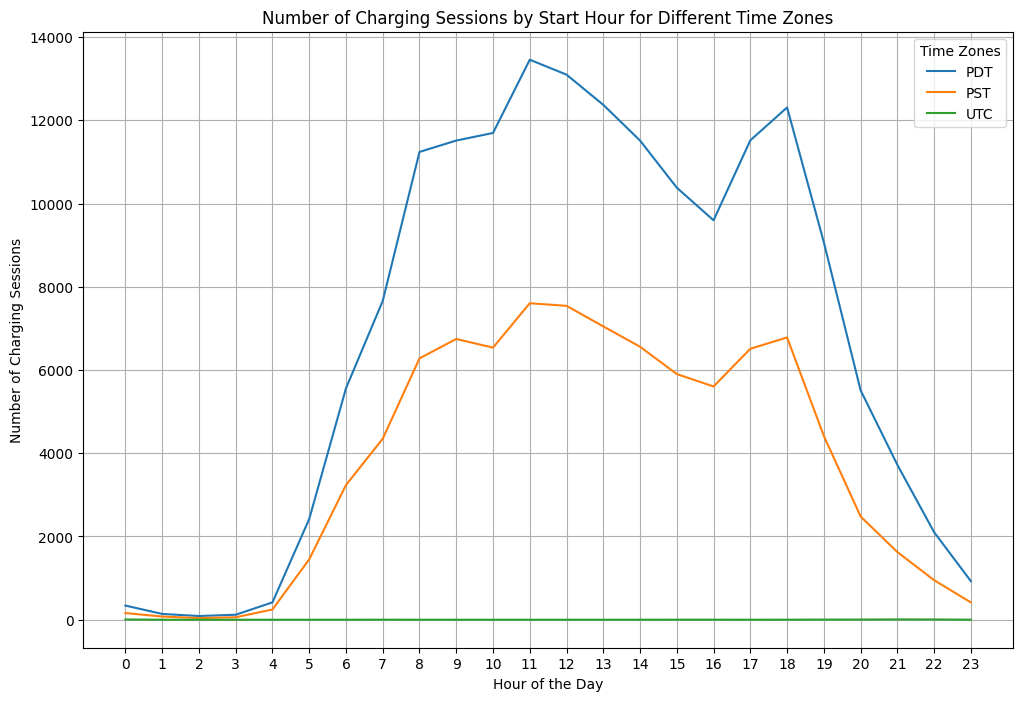

In [4]:
# Step 1: Group data by 'Start Time Zone' and 'Start Hour'
df_copy = df.copy()
df_copy['Start Hour'] = df_copy['Start Date'].dt.hour
grouped_data = df_copy.groupby(['Start Time Zone', 'Start Hour']).size().unstack(fill_value=0)

# Step 2: Plotting
plt.figure(figsize=(12, 8))

for timezone in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[timezone], label=timezone)

# Adding labels and title
plt.title('Number of Charging Sessions by Start Hour for Different Time Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.legend(title='Time Zones')
plt.xticks(range(0, 24))  # Set x-axis ticks from 0 to 23 to represent the hours
plt.grid(True)
plt.show()

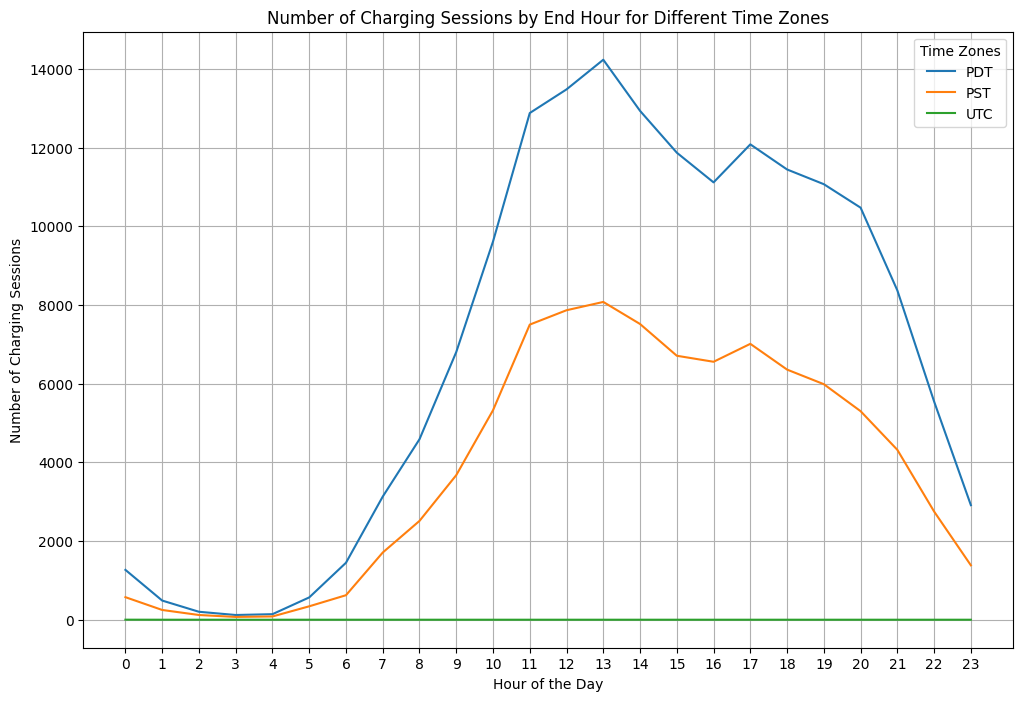

In [5]:
# Step 1: Group data by 'End Time Zone' and 'End Hour'
df_copy['End Hour'] = df_copy['End Date'].dt.hour
grouped_data = df_copy.groupby(['End Time Zone', 'End Hour']).size().unstack(fill_value=0)

# Step 2: Plotting
plt.figure(figsize=(12, 8))

for timezone in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[timezone], label=timezone)

# Adding labels and title
plt.title('Number of Charging Sessions by End Hour for Different Time Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.legend(title='Time Zones')
plt.xticks(range(0, 24))  # Set x-axis ticks from 0 to 23 to represent the hours
plt.grid(True)
plt.show()

It is observed that both PDT and PST align, thus columns with Time Zones are dropped.

The 31 records labelled as UTC will be dropped, as it is not worth converting them given the 250000 records in the dataset. 

In [6]:
df['Start Time Zone'].value_counts()

Start Time Zone
PDT    166762
PST     92618
UTC        31
Name: count, dtype: int64

In [7]:
df['End Time Zone'].value_counts()

End Time Zone
PDT    166790
PST     92620
UTC         1
Name: count, dtype: int64

In [8]:
# Remove rows with 'UTC' timezone
df = df[df['Start Time Zone'] != 'UTC']
df = df[df['End Time Zone'] != 'UTC']

Observations with currency not in USD are also dropped.

In [9]:
df['Currency'].value_counts()

Currency
USD    257578
EUR         8
MXN         5
CAD         1
Name: count, dtype: int64

In [10]:
# Remove rows not in 'USD'
df = df[df['Currency'] == 'USD']

Decided to drop the columns County, Postal Code, Address 1. Also, Country, City, State-Province, plug type and port type are irrelevant as they have the same value. Transaction Dates are also the same as End Dates, and since Transaction Dates have more null values, End Dates are kept. Null values and the first part of the station name are dropped for ease of reference.

In [11]:
# Include only relevant columns
df = df[['Station Name', 'Start Date', 'End Date', 'Total Duration (min)', 'Charging Time (min)', 'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Number', 'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID']]

# Drop rows with NaN values
df = df.dropna()

# Remove 'Palo Alto CA/' from each entry in 'Station Name'
df['Station Name'] = df['Station Name'].str.replace("PALO ALTO CA / ", "", regex=False).str.strip()

# Remove spaces after #
df['Station Name'] = df['Station Name'].str.replace(r'(?<=#)\s+', '', regex=True)

# Check if the cleaning worked
print(df['Station Name'].unique())

df

['HAMILTON #1' 'HAMILTON #2' 'HIGH #4' 'BRYANT #2' 'BRYANT #1' 'MPL #4'
 'MPL #6' 'MPL #2' 'MPL #1' 'MPL #5' 'MPL #3' 'RINCONADA LIB 2'
 'RINCONADA LIB 1' 'RINCONADA LIB 3' 'WEBSTER #1' 'HIGH #1' 'WEBSTER #2'
 'CAMBRIDGE #1' 'BRYANT #3' 'WEBSTER #3' 'CAMBRIDGE #2' 'TED THOMPSON #1'
 'HIGH #2' 'HIGH #3' 'BRYANT #6' 'BRYANT #4' 'BRYANT #5' 'TED THOMPSON #4'
 'TED THOMPSON #3' 'CAMBRIDGE #5' 'TED THOMPSON #2' 'CAMBRIDGE #3'
 'CAMBRIDGE #4' 'SHERMAN 7' 'SHERMAN 9' 'SHERMAN 8' 'SHERMAN 4'
 'SHERMAN 1' 'SHERMAN 3' 'SHERMAN 6' 'SHERMAN 14' 'SHERMAN 5' 'SHERMAN 15'
 'SHERMAN 2' 'SHERMAN 11' 'SHERMAN 17']


,Station Name,Start Date,End Date,Total Duration (min),Charging Time (min),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,HAMILTON #1,2011-07-29 20:17:00,2011-07-29 23:20:00,183.533333,114.050000,6.249457,2.625,0.784,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,3,95124.0,3284.0
1,HAMILTON #1,2011-07-30 00:00:00,2011-07-30 00:02:00,2.100000,1.900000,0.106588,0.045,0.013,2,37.444572,-122.160309,0.00,Customer,4,94301.0,4169.0
2,HAMILTON #1,2011-07-30 08:16:00,2011-07-30 12:34:00,257.533333,257.466667,14.951777,6.280,1.876,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,5,94301.0,4169.0
3,HAMILTON #1,2011-07-30 14:51:00,2011-07-30 16:55:00,123.400000,122.966667,7.159643,3.007,0.899,2,37.444572,-122.160309,0.00,Customer,6,94302.0,2545.0
4,HAMILTON #1,2011-07-30 18:51:00,2011-07-30 20:03:00,71.400000,43.900000,1.957765,0.822,0.246,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,7,94043.0,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,2020-12-31 17:14:00,35.733333,35.300000,1.841000,0.773,0.231,2,37.428623,-122.144043,0.42,Plug Out at Vehicle,2369,94301.0,2024201
259411,WEBSTER #1,2020-12-31 16:48:00,2020-12-31 20:31:00,223.016667,134.066667,12.744000,5.352,1.599,2,37.448284,-122.158272,4.69,Plug Out at Vehicle,7255,94541.0,242661
259412,MPL #4,2020-12-31 17:28:00,2021-01-01 10:56:00,1048.233333,308.200000,29.665000,12.459,3.723,1,37.422104,-122.113510,6.82,Plug Out at Vehicle,455,94306.0,449995
259413,WEBSTER #1,2020-12-31 17:49:00,2020-12-31 21:55:00,245.566667,233.700000,11.976000,5.030,1.503,1,37.448284,-122.158272,2.75,Plug Out at Vehicle,7256,94552.0,804075


Create new dataset to clean for clustering

In [12]:
data = df.copy()

,Station Name,Start Date,End Date,Total Duration (min),Charging Time (min),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,Hour,DayOfWeek,is_weekend,Week
0,HAMILTON #1,2011-07-29 20:17:00,2011-07-29 23:20:00,183.533333,114.050000,6.249457,2.625,0.784,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,3,95124.0,3284.0,20,4,False,30
1,HAMILTON #1,2011-07-30 00:00:00,2011-07-30 00:02:00,2.100000,1.900000,0.106588,0.045,0.013,2,37.444572,-122.160309,0.00,Customer,4,94301.0,4169.0,0,5,True,30
2,HAMILTON #1,2011-07-30 08:16:00,2011-07-30 12:34:00,257.533333,257.466667,14.951777,6.280,1.876,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,5,94301.0,4169.0,8,5,True,30
3,HAMILTON #1,2011-07-30 14:51:00,2011-07-30 16:55:00,123.400000,122.966667,7.159643,3.007,0.899,2,37.444572,-122.160309,0.00,Customer,6,94302.0,2545.0,14,5,True,30
4,HAMILTON #1,2011-07-30 18:51:00,2011-07-30 20:03:00,71.400000,43.900000,1.957765,0.822,0.246,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,7,94043.0,3765.0,18,5,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,TED THOMPSON #3,2020-12-31 16:39:00,2020-12-31 17:14:00,35.733333,35.300000,1.841000,0.773,0.231,2,37.428623,-122.144043,0.42,Plug Out at Vehicle,2369,94301.0,2024201,16,3,False,53
259411,WEBSTER #1,2020-12-31 16:48:00,2020-12-31 20:31:00,223.016667,134.066667,12.744000,5.352,1.599,2,37.448284,-122.158272,4.69,Plug Out at Vehicle,7255,94541.0,242661,16,3,False,53
259412,MPL #4,2020-12-31 17:28:00,2021-01-01 10:56:00,1048.233333,308.200000,29.665000,12.459,3.723,1,37.422104,-122.113510,6.82,Plug Out at Vehicle,455,94306.0,449995,17,3,False,53
259413,WEBSTER #1,2020-12-31 17:49:00,2020-12-31 21:55:00,245.566667,233.700000,11.976000,5.030,1.503,1,37.448284,-122.158272,2.75,Plug Out at Vehicle,7256,94552.0,804075,17,3,False,53


# Feature Engineering

In [13]:
# Group data by user and include only relevant columns
user_agg = data.groupby('User ID').agg({
    'Charging Time (min)': 'mean',
    'Energy (kWh)': 'mean',
    'Start Date': ['min', 'max', 'count']
})

# Rename columns for clarity
# Avg Charging Time: Each users average time in a charging session
user_agg.columns = ['Avg Charging Time', 'Avg Energy', 'First Session', 'Last Session', 'Total Sessions']

user_agg

,Avg Charging Time,Avg Energy,First Session,Last Session,Total Sessions
User ID,,,,,
102.0,163.475000,8.742773,2013-09-28 15:59:00,2014-04-22 15:55:00,2
107.0,77.033333,4.403939,2011-12-22 11:43:00,2014-08-17 11:45:00,8
111.0,100.119298,6.203329,2011-10-18 14:31:00,2014-09-26 08:39:00,19
140.0,107.075000,2.533148,2013-10-28 16:29:00,2014-10-19 18:54:00,2
151.0,54.599074,4.968370,2012-07-14 18:19:00,2019-04-02 19:50:00,18
...,...,...,...,...,...
997651,45.366667,4.510000,2017-10-07 14:01:00,2017-11-04 15:15:00,2
997831,100.183844,5.351694,2017-09-16 11:07:00,2020-11-17 11:49:00,196
998031,168.300000,15.390000,2017-09-19 11:23:00,2017-10-03 15:50:00,2


In [14]:
# Extract hour and day information
data['Hour'] = data['Start Date'].dt.hour
data['DayOfWeek'] = data['Start Date'].dt.dayofweek  # Monday=0, Sunday=6

# Create features for hour and day
hour_distribution = data.pivot_table(index='User ID', columns='Hour', values='Energy (kWh)', aggfunc='count', fill_value=0)
day_distribution = data.pivot_table(index='User ID', columns='DayOfWeek', values='Energy (kWh)', aggfunc='count', fill_value=0)

# Determine if the day is a weekend (Saturday or Sunday)
data['is_weekend'] = data['Start Date'].dt.dayofweek >= 5  # Saturday = 5, Sunday = 6

# Display hour and day distributions
display(hour_distribution)
display(day_distribution)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
User ID,,,,,,,,,,,,,,,,,,,,,
102.0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
107.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
111.0,0,0,0,0,0,0,0,0,3,1,...,1,0,1,1,4,1,0,0,0,0
140.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
151.0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,2,6,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997651,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
997831,0,0,0,0,0,0,0,0,8,9,...,24,23,4,2,0,1,0,0,0,0
998031,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


DayOfWeek,0,1,2,3,4,5,6
User ID,,,,,,,
102.0,0,1,0,0,0,1,0
107.0,0,0,1,5,1,0,1
111.0,1,3,3,4,4,2,2
140.0,1,0,0,0,0,0,1
151.0,1,3,1,2,4,6,1
...,...,...,...,...,...,...,...
997651,0,0,0,0,0,2,0
997831,26,25,33,26,31,33,22
998031,0,2,0,0,0,0,0


In [15]:
# Calculate the total active weeks
data['Week'] = data['Start Date'].dt.isocalendar().week
weeks_active = data.groupby('User ID')['Week'].nunique()

# Calculate sessions per week
user_agg['Sessions per Week'] = user_agg['Total Sessions'] / weeks_active

# Rename columns in hour_distribution
hour_distribution.columns = [f'Hour_{col}' for col in hour_distribution.columns]

# Rename columns in day_distribution
day_distribution.columns = [f'Day_{col}' for col in day_distribution.columns]

# Combine features
features = user_agg.join(hour_distribution, how='left').join(day_distribution, how='left')

# Reset index to make 'User ID' a column
features = features.reset_index()

print(features['Avg Charging Time'].head())
print(features['Avg Charging Time'].dtype)

0    163.475000
1     77.033333
2    100.119298
3    107.075000
4     54.599074
Name: Avg Charging Time, dtype: float64
float64


## Data Transformation

In [16]:
# Select only numeric columns
numeric_cols = features.drop(columns=["First Session", "Last Session", "User ID"]).columns
numeric_features = features[numeric_cols]

# Calculate skewness for numeric features
skewness = numeric_features.apply(skew)
print(skewness)

Avg Charging Time      2.026941
Avg Energy             2.568106
Total Sessions        10.242770
Sessions per Week      7.609715
Hour_0                41.722655
Hour_1                44.723668
Hour_2               104.378829
Hour_3               149.943328
Hour_4                82.560796
Hour_5                75.500359
Hour_6                33.010963
Hour_7                31.494261
Hour_8                25.953845
Hour_9                14.466172
Hour_10               17.180371
Hour_11               14.427453
Hour_12               17.183671
Hour_13               13.199817
Hour_14               16.894081
Hour_15               20.990266
Hour_16               15.543509
Hour_17               15.573159
Hour_18               35.405198
Hour_19               20.380469
Hour_20               23.655050
Hour_21               34.557548
Hour_22               41.032005
Hour_23               44.533191
Day_0                 10.195037
Day_1                 10.254714
Day_2                 10.416782
Day_3   

Skewness > +1 or < -1: Highly skewed.

Skewness between -1 and -0.5 or 0.5 and 1: Moderately skewed.

Skewness between -0.5 and 0.5: Approximately symmetric.

High Skewed ones need to be transformed.

In [17]:
# Identify skewed features
skewed_features = skewness[abs(skewness) > 1].index
# Define log1p_transformed as a empty dataframe
log1p_transformed = pd.DataFrame()
# Apply log1p transformation to skewed features
for feature in skewed_features:
    log1p_transformed[feature] = np.log1p(features[feature])

# Recalculate skewness
skewness_transformed = log1p_transformed.apply(skew)
print("Skewness afte log1p transformation:\n", skewness_transformed)

Skewness afte log1p transformation:
 Avg Charging Time    -1.423508
Avg Energy           -0.269247
Total Sessions        1.883942
Sessions per Week     3.749472
Hour_0               18.515940
Hour_1               23.232176
Hour_2               31.894908
Hour_3               42.890505
Hour_4               30.067090
Hour_5               17.275809
Hour_6               10.211425
Hour_7                6.480661
Hour_8                4.608763
Hour_9                3.870301
Hour_10               3.405022
Hour_11               2.769747
Hour_12               2.464901
Hour_13               2.763057
Hour_14               3.073758
Hour_15               3.186585
Hour_16               3.075297
Hour_17               2.608183
Hour_18               2.418712
Hour_19               2.990902
Hour_20               4.508305
Hour_21               6.813636
Hour_22               9.539197
Hour_23              12.350985
Day_0                 2.709153
Day_1                 2.561529
Day_2                 2.461429
Da

Logarithmic transformation has reduced the skewness for some features but many features remained highly skewed. It would affect the performance of the clustering algorithm. Therefore, we will need to use other methods to reduce skewness.

For each skewed_features in features df, we calculate the skewness of the feature and apply np.log1p, np.sqrt, np.cbrt, and boxcox transformations to reduce the skewness of the feature. Then, we calculate the skewness of the transformed feature and select the best method.

In [18]:
# Define a function to calculate skewness and apply transformations
def transform_and_select_best(features, skewed_features):
    best_transformed = pd.DataFrame()
    for feature in skewed_features:
        # Original skewness
        original_skewness = skew(features[feature])
        
        # Apply transformations
        log1p_transformed = np.log1p(features[feature])
        sqrt_transformed = np.sqrt(features[feature])
        cbrt_transformed = np.cbrt(features[feature])
        # Apply boxcox transformation
        # Check for zeros or negative values
        if features[feature].min() > 0:
            boxcox_transformed, fitted_lambda = boxcox(features[feature])
        else:
            boxcox_transformed = features[feature]
        
        # Calculate skewness for each transformation
        log1p_skewness = skew(log1p_transformed)
        sqrt_skewness = skew(sqrt_transformed)
        cbrt_skewness = skew(cbrt_transformed)
        boxcox_skewness = skew(boxcox_transformed)
        
        # Find the transformation with the skewness closest to 0
        skewness_values = {
            'log1p': log1p_skewness,
            'sqrt': sqrt_skewness,
            'cbrt': cbrt_skewness,
            'boxcox': boxcox_skewness
        }
        best_transformation = min(skewness_values, key=lambda k: abs(skewness_values[k]))
        
        # Apply the best transformation
        if best_transformation == 'log1p':
            best_transformed[feature] = log1p_transformed
        elif best_transformation == 'sqrt':
            best_transformed[feature] = sqrt_transformed
        elif best_transformation == 'cbrt':
            best_transformed[feature] = cbrt_transformed
        elif best_transformation == 'boxcox':
            best_transformed[feature] = boxcox_transformed
        
        print(f"Feature: {feature}, Original Skewness: {original_skewness}, Best Transformation: {best_transformation}, Skewness after Transformation: {skewness_values[best_transformation]}")
    
    return best_transformed

# Apply the function to the skewed features
best_transformed_features = transform_and_select_best(features, skewed_features)

Feature: Avg Charging Time, Original Skewness: 2.026940505493921, Best Transformation: boxcox, Skewness after Transformation: 0.0988797975312933
Feature: Avg Energy, Original Skewness: 2.5681059979277108, Best Transformation: cbrt, Skewness after Transformation: 0.06883821142178158
Feature: Total Sessions, Original Skewness: 10.242769953595158, Best Transformation: boxcox, Skewness after Transformation: 0.41299319450019745
Feature: Sessions per Week, Original Skewness: 7.609715234627752, Best Transformation: boxcox, Skewness after Transformation: 1.2576261627390342
Feature: Hour_0, Original Skewness: 41.722654510847214, Best Transformation: cbrt, Skewness after Transformation: 14.854810642070046
Feature: Hour_1, Original Skewness: 44.72366824150028, Best Transformation: cbrt, Skewness after Transformation: 18.38425499194526
Feature: Hour_2, Original Skewness: 104.3788293041537, Best Transformation: cbrt, Skewness after Transformation: 25.099263655831606
Feature: Hour_3, Original Skewne

## Interpretation of All Transformation Methods


Mostly the skewness of the features has been reduced after applying the transformations. However, from Hour_21 to Hour_8 could not be sufficently reduced. Therefore, we will group those hours as Night Group for clustering

In [19]:
# Aggregate sparse hours into broader categories
features['Night_Group'] = features[['Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7','Hour_8', 'Hour_21', 'Hour_22', 'Hour_23']].sum(axis=1)

# Drop individual hour columns
features = features.drop(['Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5','Hour_6', 'Hour_7','Hour_8','Hour_21','Hour_22', 'Hour_23'], axis=1)

# Update the list of skewed features
skewed_features = skewed_features.drop(['Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5','Hour_6', 'Hour_7','Hour_8','Hour_21','Hour_22', 'Hour_23'])
skewed_features = skewed_features.append(pd.Index(['Night_Group']))

In [20]:
# Apply the function to the skewed features
best_transformed_features = transform_and_select_best(features, skewed_features)

Feature: Avg Charging Time, Original Skewness: 2.026940505493921, Best Transformation: boxcox, Skewness after Transformation: 0.0988797975312933
Feature: Avg Energy, Original Skewness: 2.5681059979277108, Best Transformation: cbrt, Skewness after Transformation: 0.06883821142178158
Feature: Total Sessions, Original Skewness: 10.242769953595158, Best Transformation: boxcox, Skewness after Transformation: 0.41299319450019745
Feature: Sessions per Week, Original Skewness: 7.609715234627752, Best Transformation: boxcox, Skewness after Transformation: 1.2576261627390342
Feature: Hour_9, Original Skewness: 14.466171753159497, Best Transformation: cbrt, Skewness after Transformation: 3.114070332342063
Feature: Hour_10, Original Skewness: 17.18037135953695, Best Transformation: cbrt, Skewness after Transformation: 2.5947921037540507
Feature: Hour_11, Original Skewness: 14.427452926296437, Best Transformation: cbrt, Skewness after Transformation: 1.944157434792546
Feature: Hour_12, Original Ske

In [21]:
# Apply the transformation to the features
features[skewed_features] = best_transformed_features

# 2. Mandatory Component (Clustering)

### Clustering based on Average Energy consumed per user per day

In [22]:
# Select features for clustering
clustering_features = features[["Avg Energy", "Day_0", "Day_1", "Day_2", "Day_3", "Day_4", "Day_5", "Day_6"]]
clustering_features = features[["Avg Energy", "Day_0", "Day_1", "Day_2", "Day_3", "Day_4", "Day_5", "Day_6"]]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

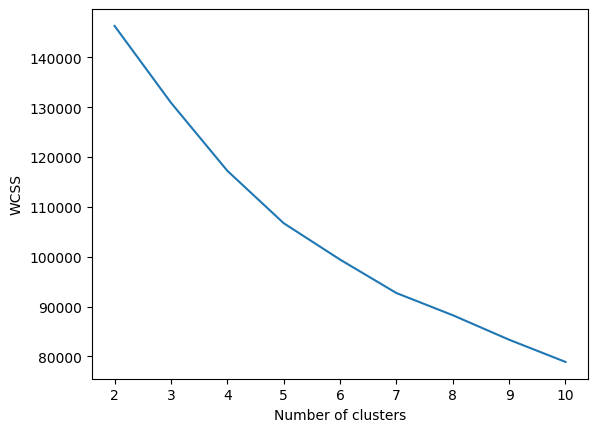

Number of clusters: 2, Silhouette Score: 0.49440338000264195
Number of clusters: 3, Silhouette Score: 0.32153596294270487
Number of clusters: 4, Silhouette Score: 0.14262289906421238
Number of clusters: 5, Silhouette Score: 0.16901165253592532
Number of clusters: 6, Silhouette Score: 0.1827952635967664
Number of clusters: 7, Silhouette Score: 0.19030778661534187
Number of clusters: 8, Silhouette Score: 0.19900139469712327
Number of clusters: 9, Silhouette Score: 0.20435305848794263
Number of clusters: 10, Silhouette Score: 0.22132554439669633


In [23]:
# Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

Elbow method is not giving a clear interpretation. According to silhouette scores, k=2.

In [24]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)

/tmp/ipykernel_47/4021358816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)


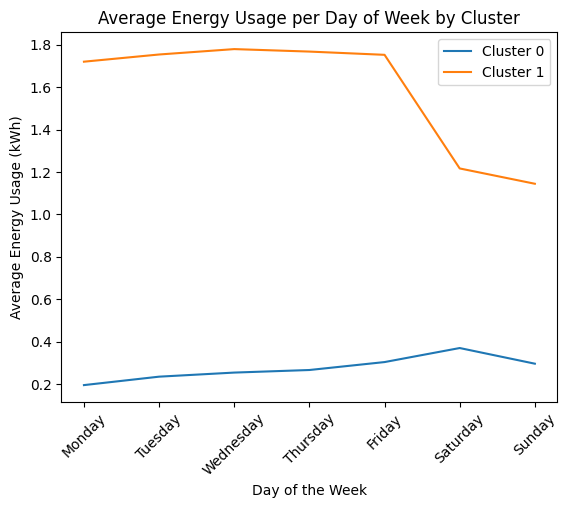

In [25]:
cluster_profiles = clustering_features.groupby('Cluster').mean()

# Plot average energy usage per day for each cluster
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for cluster in cluster_profiles.index:
    plt.plot(days, cluster_profiles.loc[cluster, [f'Day_{i}' for i in range(7)]], label=f'Cluster {cluster}')

plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Usage (kWh)')
plt.title('Average Energy Usage per Day of Week by Cluster')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Interpretation

### Cluster 0 (Weekend/Low Users):

Cluster 0 users have low energy consumption, primarily charging EVs for leisure activities on weekends. They have home charging stations and short driving distances, likely due to remote work or retirement. Cost sensitivity and lifestyle choices influence their EV use.

### Cluster 1 (Weekday Commuters):

Cluster 1 is primarily high-energy users active on weekdays, relying on public charging stations due to limited home access. They prefer electric vehicles (EVs) over conventional vehicles due to environmental awareness and the need for public infrastructure.

## Recommendation

### Target Group: Cluster 1 (Weekday Commuters)

Cluster 1 is a predictable, energy-intensive user base with high weekday energy consumption, relying on public charging for revenue. Their regular weekday patterns align closely with urban or semi-urban charging networks near workplaces and businesses
Targeting this group offers higher ROI and loyalty opportunities.

### Promotion strategy


Request Partnership at Work:
Collaborate with businesses and office facilities to offer reduced or subscription-based charging plans. Providing free charging during specific time windows, such as early mornings, can incentivize weekday commuters to regularly use workplace chargers.

Royalty Program:
Establish a rewards system for frequent weekday users, allowing them to earn points for each charging session. These points can be redeemed for future charging costs, maintenance services, or discounts on EV accessories.

Commuter Plans:
Introduce subscription plans tailored for weekday commuters, such as unlimited weekday charging for a flat monthly fee. This approach helps users manage costs while encouraging exclusive use of the company’s charging network.

### Clustering based on Weekend/ Weekday usage

In [26]:
# Aggregate the data by 'User ID' to calculate weekend vs weekday behavior
user_weekday_weekend = data.groupby('User ID').agg(
    weekday_charges=('is_weekend', lambda x: (x == 0).sum()),  # count weekday charges
    weekend_charges=('is_weekend', lambda x: (x == 1).sum())  # count weekend charges
).reset_index()

# Merge data only if columns don't exist
if 'weekday_charges' not in features.columns and 'weekend_charges' not in features.columns:
    features = features.merge(user_weekday_weekend, on='User ID', how='left')

In [27]:
# Select features for clustering
clustering_features2 = features[["weekday_charges", "weekend_charges", 'Day_0', 'Day_1',
       'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6']]

# Scale the features for K-means
scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(clustering_features2)

In [28]:
# Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features2)
    score = silhouette_score(scaled_features2, labels)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

Number of clusters: 2, Silhouette Score: 0.5918116197398111
Number of clusters: 3, Silhouette Score: 0.46479237371369686
Number of clusters: 4, Silhouette Score: 0.2409319494165451
Number of clusters: 5, Silhouette Score: 0.24429551490185394
Number of clusters: 6, Silhouette Score: 0.23129168609564185
Number of clusters: 7, Silhouette Score: 0.2617727709982507
Number of clusters: 8, Silhouette Score: 0.2981971148925735
Number of clusters: 9, Silhouette Score: 0.3160733069932277
Number of clusters: 10, Silhouette Score: 0.3472465935184394


/tmp/ipykernel_47/709060364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features2['Cluster'] = kmeans.fit_predict(scaled_features2)


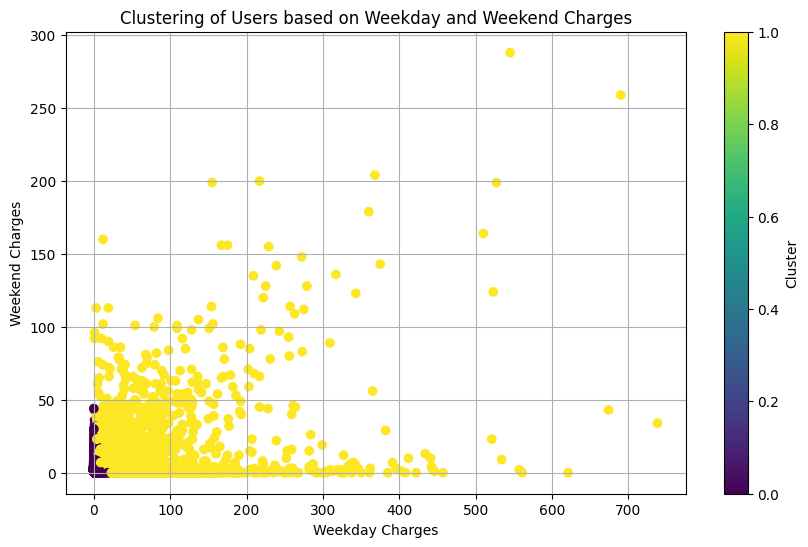

In [29]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clustering_features2['Cluster'] = kmeans.fit_predict(scaled_features2)

# Plot the clusters based on 'weekday_charges' and 'weekend_charges'
plt.figure(figsize=(10, 6))
plt.scatter(clustering_features2['weekday_charges'], clustering_features2['weekend_charges'], c=clustering_features2['Cluster'], cmap='viridis', marker='o')

# Add titles and labels
plt.title('Clustering of Users based on Weekday and Weekend Charges')
plt.xlabel('Weekday Charges')
plt.ylabel('Weekend Charges')
plt.colorbar(label='Cluster') 
plt.grid(True)
plt.show()

/tmp/ipykernel_47/235319687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features2['Cluster'] = kmeans.fit_predict(scaled_features2)


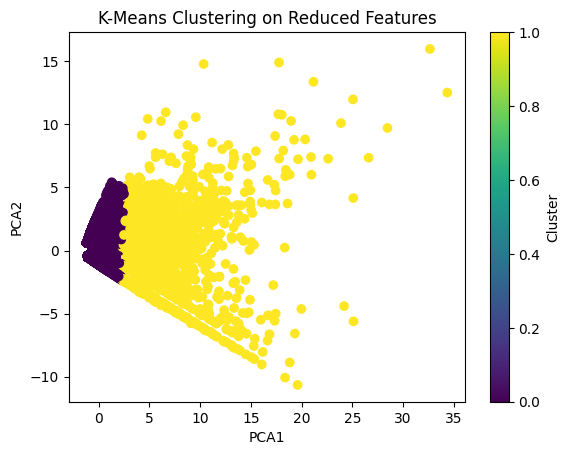

In [30]:
# Apply K-Means on the reduced features
kmeans = KMeans(n_clusters=2, random_state=42)
clustering_features2['Cluster'] = kmeans.fit_predict(scaled_features2)

# Apply PCA or t-SNE for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features2)

# Plot the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clustering_features2['Cluster'], cmap='viridis', marker='o')
, cmap='viridis')
plt.title('K-Means Clustering on Reduced Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

Clustering using weekday-weekday usage does not really give meaningful results for identifying clusters. So, we decided not to use this features.

# 3. Exploratory Component

In this exploratory component, I chose to look at how the company can potentially increase optimisation of charging stations to reduce costs. In order to do this, I need to identify underutilized stations to optimize pricing, improve infrastructure, or increase capacity. As such, the research question is defined as follows:

## How can station performance data be leveraged to identify opportunities for optimising the usage of EV charging stations?

To answer this question, we first need to visualise the total energy consumed by each station, as well as the energy consumed by hour of day across all the stations. Before that, statistics for Total Duration and Charging Time are calculated.

In [31]:
# Computing statistics for total duration
print(f"""
Total duration statistics:
Total duration range (min): [{min(df['Total Duration (min)']):.2f}, {max(df['Total Duration (min)']):.2f}]
Mean: {df['Total Duration (min)'].mean():.2f}
Median: {df['Total Duration (min)'].median():.2f}
STD:  {df['Total Duration (min)'].std():.2f}""")

# Computing statistics for charging time
print(f"""
Charging time statistics:
Charging time range (min): [{min(df['Charging Time (min)']):.2f}, {max(df['Charging Time (min)']):.2f}]
Mean: {df['Charging Time (min)'].mean():.2f}
Median: {df['Charging Time (min)'].median():.2f}
STD:  {df['Charging Time (min)'].std():.2f}""")


Total duration statistics:
Total duration range (min): [1.00, 6872.35]
Mean: 148.79
Median: 125.47
STD:  131.87

Charging time statistics:
Charging time range (min): [0.10, 1375.92]
Mean: 119.79
Median: 109.22
STD:  82.16


From here, it can be deduced that there are a few outliers because the maximum times for Charging Time and Total Duration are significantly greater than the mean and the median. To improve the integrity of the data, any observation whose Charging Time and Total Duration exceeds the 99th percentile is eliminated as an outlier.

In [32]:
# Calculate the 99th percentiles
duration_percentiles = df['Total Duration (min)'].quantile(0.99)
charging_percentiles = df['Charging Time (min)'].quantile(0.99)

# Create masks for outliers
outliers = (df['Total Duration (min)'] > duration_percentiles) | \
           (df['Charging Time (min)'] > charging_percentiles)

# Count the number of outliers
num_outliers = outliers.sum()

# Remove outliers
df = df[~outliers]

# Display the number of outliers removed and the resulting DataFrame
print(f"Number of outliers removed: {num_outliers}")

df

Number of outliers removed: 4358


,Station Name,Start Date,End Date,Total Duration (min),Charging Time (min),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,HAMILTON #1,2011-07-29 20:17:00,2011-07-29 23:20:00,183.533333,114.050000,6.249457,2.625,0.784,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,3,95124.0,3284.0
1,HAMILTON #1,2011-07-30 00:00:00,2011-07-30 00:02:00,2.100000,1.900000,0.106588,0.045,0.013,2,37.444572,-122.160309,0.00,Customer,4,94301.0,4169.0
2,HAMILTON #1,2011-07-30 08:16:00,2011-07-30 12:34:00,257.533333,257.466667,14.951777,6.280,1.876,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,5,94301.0,4169.0
3,HAMILTON #1,2011-07-30 14:51:00,2011-07-30 16:55:00,123.400000,122.966667,7.159643,3.007,0.899,2,37.444572,-122.160309,0.00,Customer,6,94302.0,2545.0
4,HAMILTON #1,2011-07-30 18:51:00,2011-07-30 20:03:00,71.400000,43.900000,1.957765,0.822,0.246,2,37.444572,-122.160309,0.00,Plug Out at Vehicle,7,94043.0,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259409,CAMBRIDGE #5,2020-12-31 15:51:00,2020-12-31 17:30:00,98.450000,81.600000,2.535000,1.065,0.318,1,37.426228,-122.145981,0.58,Plug Out at Vehicle,4672,94303.0,2652881
259410,TED THOMPSON #3,2020-12-31 16:39:00,2020-12-31 17:14:00,35.733333,35.300000,1.841000,0.773,0.231,2,37.428623,-122.144043,0.42,Plug Out at Vehicle,2369,94301.0,2024201
259411,WEBSTER #1,2020-12-31 16:48:00,2020-12-31 20:31:00,223.016667,134.066667,12.744000,5.352,1.599,2,37.448284,-122.158272,4.69,Plug Out at Vehicle,7255,94541.0,242661
259413,WEBSTER #1,2020-12-31 17:49:00,2020-12-31 21:55:00,245.566667,233.700000,11.976000,5.030,1.503,1,37.448284,-122.158272,2.75,Plug Out at Vehicle,7256,94552.0,804075


A histogram of the cleaned data is shown below.

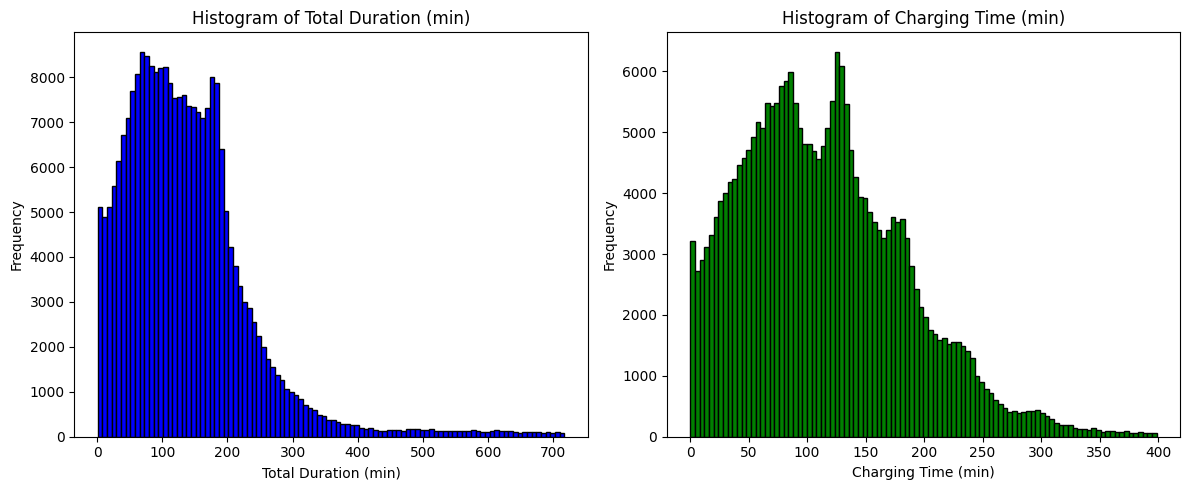

In [33]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot histogram for "Total Duration (min)"
axes[0].hist(df['Total Duration (min)'], bins=100, color='blue', edgecolor='black')
axes[0].set_title("Histogram of Total Duration (min)")
axes[0].set_xlabel("Total Duration (min)")
axes[0].set_ylabel("Frequency")

# Plot histogram for "Charging Time (min)"
axes[1].hist(df['Charging Time (min)'], bins=100, color='green', edgecolor='black')
axes[1].set_title("Histogram of Charging Time (min)")
axes[1].set_xlabel("Charging Time (min)")
axes[1].set_ylabel("Frequency")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The histograms, although still right skewed, now give a better representation of the data since the most extreme outliers have been removed.

Next, let's aggregate the energy consumption by station and sum the total energy used at each station, then visualise the energy consumption of each station in the dataset.

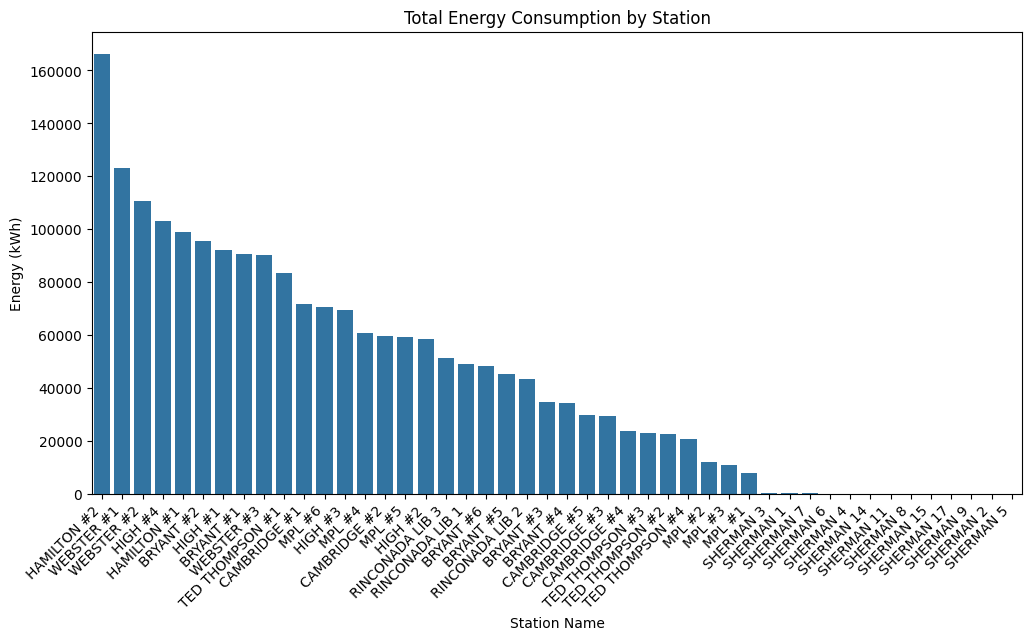

In [34]:
# Aggregate energy consumption by station
station_usage = df.groupby('Station Name').agg({
    'Energy (kWh)': 'sum',
}).reset_index()

# Visualize energy consumption by station
plt.figure(figsize=(12, 6))
sb.barplot(data=station_usage, x='Station Name', y='Energy (kWh)', order=station_usage.sort_values('Energy (kWh)', ascending=False)['Station Name'])
plt.xticks(rotation=45, ha='right')
plt.title("Total Energy Consumption by Station")
plt.show()

From this, a model can be trained to predict the energy consumption by station. Firstly, we aggregate the data by station name and take the sum of energy, charging time and total duration. Latitude and longitude, as well as session coount is also considered to see if it plays a role in the prediction.

In [35]:
# Aggregate by station name
agg_data = df.groupby('Station Name').agg({
    'Energy (kWh)': 'sum',          # Total energy consumed
    'Charging Time (min)': 'sum',        # Total charging time
    'Total Duration (min)': 'sum',       # Total session duration
    'Latitude': 'first',            # Station's latitude (fixed per station)
    'Longitude': 'first'            # Station's longitude (fixed per station)
}).reset_index()

# Add a feature: number of charging sessions
agg_data['Session Count'] = df.groupby('Station Name').size().values

# Rename the target column
agg_data.rename(columns={'Energy (kWh)': 'Total Energy'}, inplace=True)

agg_data

,Station Name,Total Energy,Charging Time (min),Total Duration (min),Latitude,Longitude,Session Count
0,BRYANT #1,90608.501456,1.460337e+06,1.793778e+06,37.446373,-122.162331,12283
1,BRYANT #2,95355.863057,1.529301e+06,1.887030e+06,37.446373,-122.162331,13210
2,BRYANT #3,34682.400633,4.864727e+05,5.835651e+05,37.446583,-122.162109,4210
3,BRYANT #4,34063.338000,4.279295e+05,4.772700e+05,37.446785,-122.162369,3441
4,BRYANT #5,45310.318000,5.875002e+05,6.626214e+05,37.446690,-122.162231,5143
5,BRYANT #6,48258.802000,6.632646e+05,7.612119e+05,37.446667,-122.162170,5634
6,CAMBRIDGE #1,71761.962790,1.126864e+06,1.336015e+06,37.427349,-122.145676,10584
7,CAMBRIDGE #2,59607.126205,9.943637e+05,1.173464e+06,37.427330,-122.145699,8820
8,CAMBRIDGE #3,29222.864000,4.027444e+05,4.576840e+05,37.426208,-122.146011,4339
9,CAMBRIDGE #4,23759.477000,3.031209e+05,3.454292e+05,37.426178,-122.146034,3337


Now, we can prepare the data for prediction and split the data for testing and training. Gradient Boosting Regressor is used to predict energy usage of each station, and then compared to the actual energy used.

In [36]:
# Drop columns that are not relevant
X = agg_data.drop(['Station Name', 'Total Energy'], axis=1)  # Features (remove 'Station Name' and 'Total Energy' column)
y = agg_data['Total Energy']  # Target variable (Energy consumption)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(
    n_estimators=300,       # Number of boosting stages
    learning_rate=0.1,      # Shrinks contribution of each tree
    max_depth=5,            # Maximum depth of individual trees
    min_samples_split=10,   # Minimum samples required to split an internal node
    random_state=42         # Seed for reproducibility
)

# Train the model using the training data
gbr_model.fit(X_train, y_train)

# Predict energy consumption on the test set
y_pred_test = gbr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 7942.51
Root Mean Squared Error (RMSE): 15225.53
R2 Score: 0.91


Now that our model is trained, we can predict the energy consumption for all stations. For ease of visualization, the 'Total Energy' column is sorted in descending order to match the previous bar plot.

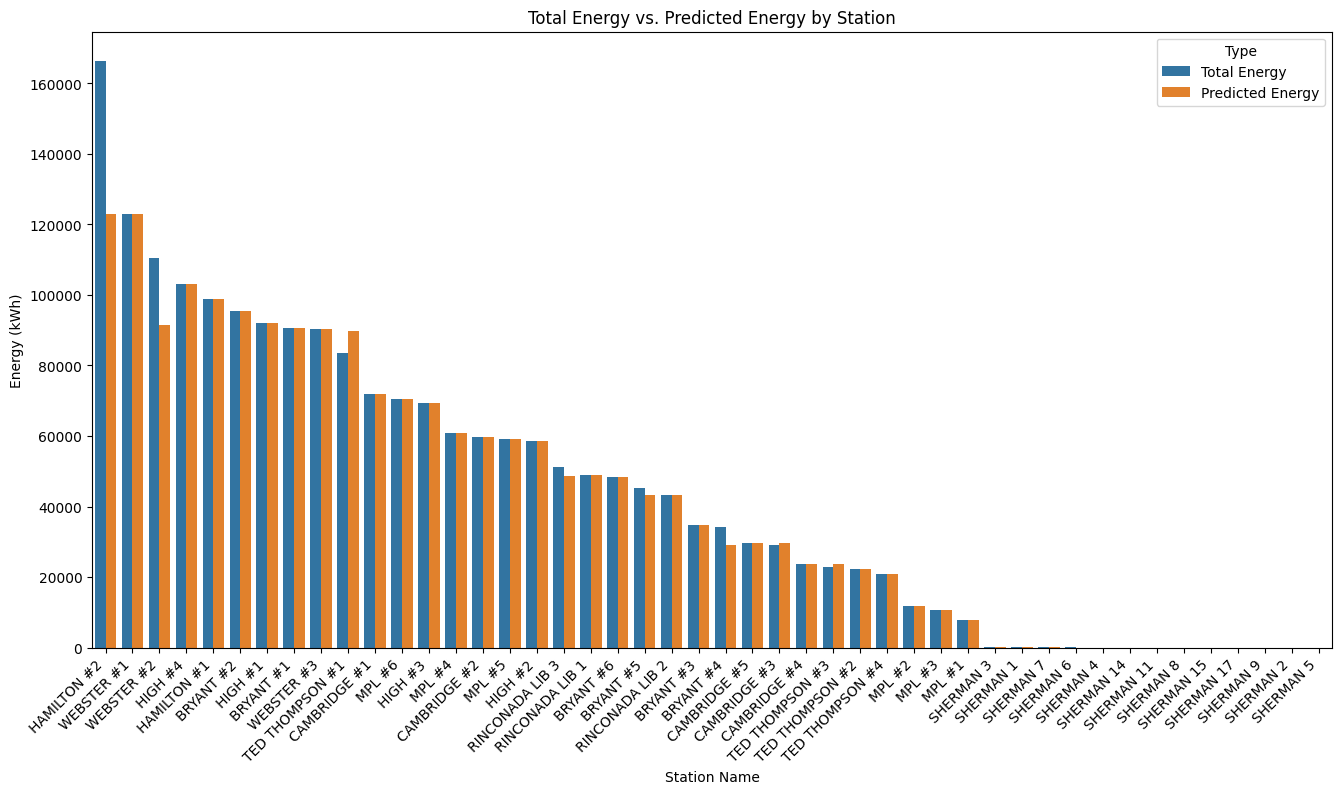

In [37]:
# Predict energy consumption for all stations
agg_data['Predicted Energy'] = gbr_model.predict(X)

# Sort by actual energy for better visualization
agg_data = agg_data.sort_values(by='Total Energy', ascending=False)

# Visualize Total vs. Predicted Energy consumption by station
agg_data_melted = agg_data.melt(
    id_vars=['Station Name'], 
    value_vars=['Total Energy', 'Predicted Energy'], 
    var_name='Type', 
    value_name='Energy (kWh)'
)

plt.figure(figsize=(16, 8))
sb.barplot(data=agg_data_melted, x='Station Name', y='Energy (kWh)', hue='Type')
plt.xticks(rotation=45, ha='right')
plt.title('Total Energy vs. Predicted Energy by Station')
plt.ylabel('Energy (kWh)')
plt.xlabel('Station Name')
plt.legend(title='Type')
plt.show()

As can be seen, there are some gaps between the actual (total) and predicted energy based on our model. To make sense of these discrepancies, we create 2 new columns: 'Energy Gap' and 'Relative Error (%)'

These columns allow us to determine the stations that have energy usages that are not well-predicted.

In [48]:
# Calculate the energy gap (absolute error)
agg_data['Energy Gap'] = abs(agg_data['Total Energy'] - agg_data['Predicted Energy'])

# Calculate relative error
agg_data['Relative Error (%)'] = (agg_data['Energy Gap'] / agg_data['Total Energy']) * 100

# Display stations by descending order of energy gap and relative error
energy_error = agg_data[['Station Name', 'Total Energy', 'Predicted Energy', 'Energy Gap']]
relative_error = agg_data[['Station Name', 'Total Energy', 'Predicted Energy', 'Relative Error (%)']]
print("Sorted by Energy Gap:")
print(energy_error.sort_values(by='Energy Gap', ascending=False))
print("Sorted by Relative Error:")
print(relative_error.sort_values(by='Relative Error (%)', ascending=False))

# Print number of stations
print("Number of stations:", len(agg_data['Station Name'].unique()))

Sorted by Energy Gap:
       Station Name   Total Energy  Predicted Energy    Energy Gap
12      HAMILTON #2  166341.138290     122938.762456  43402.375834
44       WEBSTER #2  110438.682781      91507.462062  18931.220719
39  TED THOMPSON #1   83412.660749      89665.977494   6253.316745
3         BRYANT #4   34063.338000      29056.108586   5007.229414
25  RINCONADA LIB 3   51341.399534      48747.934999   2593.464535
4         BRYANT #5   45310.318000      43226.609507   2083.708493
41  TED THOMPSON #3   22978.158000      23788.733246    810.575246
8      CAMBRIDGE #3   29222.864000      29554.383528    331.519528
35        SHERMAN 6      31.862000         21.617807     10.244193
26        SHERMAN 1      92.514000         93.989791      1.475791
32        SHERMAN 3     102.600000        102.052867      0.547133
10     CAMBRIDGE #5   29556.123000      29555.768492      0.354508
7      CAMBRIDGE #2   59607.126205      59607.464203      0.337998
42  TED THOMPSON #4   20771.953000      

To further aid in the visualization, a scatter plot is created to compare how each station's actual energy differs from the predicted energy.

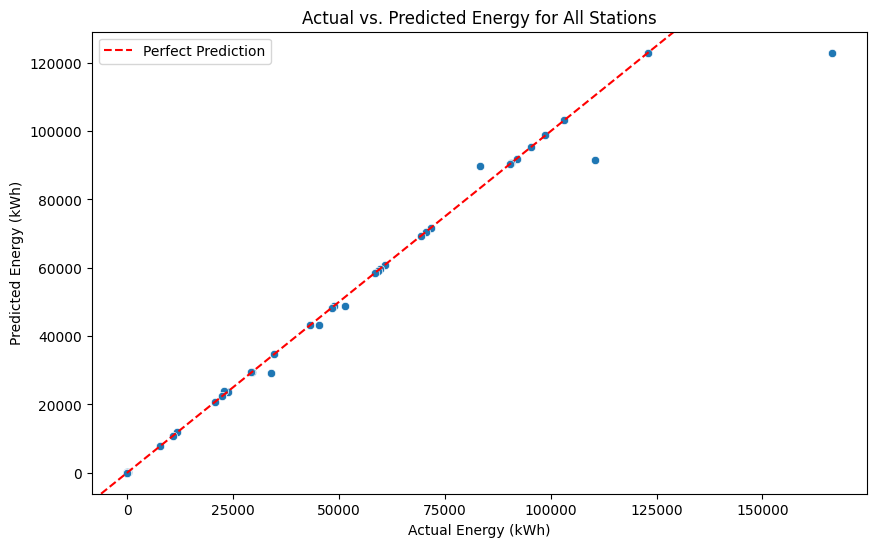

In [39]:
# Create a scatter plot to visualize actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
sb.scatterplot(x=agg_data['Total Energy'], y=agg_data['Predicted Energy'])
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Energy (kWh)')
plt.ylabel('Predicted Energy (kWh)')
plt.title('Actual vs. Predicted Energy for All Stations')
plt.legend()
plt.show()

Additionally, to find out which of the features fed into the model are the most important, the fitted attribute 'feature_importances_' is used. 

In [40]:
# Analyze feature importance to see which variables have the greatest impact on energy prediction
feature_importances = pd.DataFrame(
    gbr_model.feature_importances_,
    index=X.columns,
    columns=['Importance']
).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importances)

Feature Importance:
                      Importance
Total Duration (min)    0.626946
Charging Time (min)     0.184525
Session Count           0.180171
Longitude               0.006896
Latitude                0.001462


## Interpretation and Recommendations

Firstly, majority of the station energy usage predictions are accurate, which corresponds to an ideal usage rate of the stations. This is given by a relative error rate of less than 5% for 39 of 46 stations. 

### Very high energy gap (predicted < actual)

The most pertinent station in this analysis is HAMILTON #2, where the energy gap is high at 43402. Since predicted energy is lower than total energy, it suggests that this station is heavily overutilised according to the prediction model. Cross-checking with this location using longitude and latitude, this result makes sense as this charging station is in a busy area of Palo Alto, right next to major buildings and infrastructure such as the city hall, main train station and shopping centre. A recommendation for this case is to build an adjacent or neighbouring charging station to ease the load.

### High energy gap (predicted < actual)

Looking at the stations WEBSTER #2, BRYANT #4, RINCONDA LIB 3 and BRYANT #5, their predicted energy is also lower than total energy but to a smaller extent. To address this, a recommendation would be to either expand the charging capacity (increase number of charging units) or slightly increasing prices at peak periods. This deters some customers from using the charging station at the busiest periods, ensuring that the energy consumption eases off as well.

### High energy gap (predicted > actual)

Moving on, the stations TED THOMPSON #1, TED THOMPSON #3 and CAMBRIDGE #3 have predicted energy that is non-negligibly higher than total energy. This means that the model overestimates the actual energy usage for these stations, meaning that the stations are underutilised. To realise the potential gains from these stations, the company should consider giving discounts at these stations during off-peak periods to encourage more users to use these stations.

# 4. Conclusions

## Clustering

Clustering includes 4 sections: pre-processing, feature engineering, data transformation and clustering itself. In pre-processing we make the data ready by changing dtypes and dropping columns when necesaary. Feature engineering includes necessary additions or changes for creating new features for further use. After analyzing skewness, we found out that data is highly skewed and handling it may bring better results. Finally, we tried K-means clustering using two different features and took the most meaningful one to give recommendations.

## Exploratory

In this exploratory component, we have succesfully answered the research question by pinpointing the under and overutilised stations using Gradient Boosting Regression. By adjusting the business according to our recommendations, actual energy consumed will align more with predicted energy, leading to greater resource optimisation.